In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/WhatsApp Image 2021-04-06 at 11.10.46.jpeg')


In [3]:
img.shape

(1600, 900, 3)

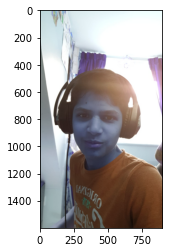

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1600, 900)

In [6]:
gray

array([[213, 213, 214, ..., 250, 250, 250],
       [212, 213, 214, ..., 250, 250, 250],
       [211, 212, 213, ..., 250, 250, 250],
       ...,
       [ 96,  96,  96, ...,  59,  59,  59],
       [ 96,  96,  96, ...,  59,  59,  59],
       [ 96,  96,  96, ...,  59,  59,  59]], dtype=uint8)

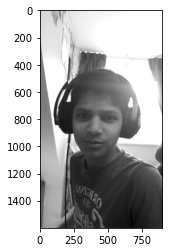

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[200, 629, 403, 403]], dtype=int32)

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(200, 629, 403, 403)

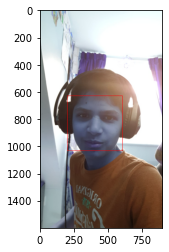

In [10]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

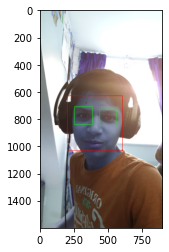

In [11]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()



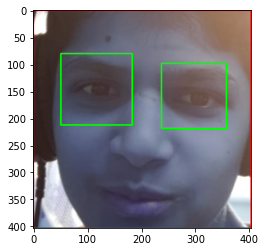

In [12]:
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color


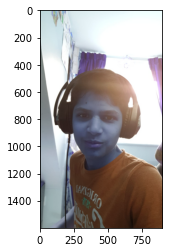

In [14]:
original_image = cv2.imread('./test_images/WhatsApp Image 2021-04-06 at 11.10.46.jpeg')
plt.imshow(original_image)

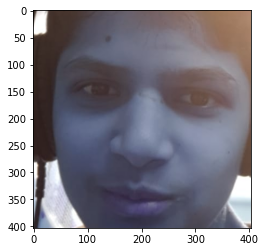

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/WhatsApp Image 2021-04-06 at 11.10.46.jpeg')
plt.imshow(cropped_image)

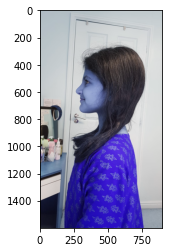

In [16]:
org_image_obstructed = cv2.imread('./test_images/WhatsApp Image 2021-04-06 at 11.11.04.jpeg')
plt.imshow(org_image_obstructed)

In [17]:
cropped_image_no_eyes = get_cropped_image_if_2_eyes('./test_images/WhatsApp Image 2021-04-06 at 11.11.04.jpeg')
cropped_image_no_eyes

In [18]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [19]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data): #getting the names of each of the folders in the directory.
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/cropped',
 './dataset/Fajar',
 './dataset/Hassan',
 './dataset/Hussain',
 './dataset/Mehral']

In [21]:
import shutil
if os.path.exists(path_to_cr_data): #removing if folder already exists
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
sibling_file_names_dict = {}
for img_dir in img_dirs:
    count=1
    sibling_name = img_dir.split('/')[-1]
    print(sibling_name)
    sibling_file_names_dict[sibling_name]=[]
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + sibling_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = sibling_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            sibling_file_names_dict[sibling_name].append(cropped_file_path)
            count+=1

cropped
Fajar
Generating cropped images in folder:  ./dataset/cropped/Fajar
Hassan
Generating cropped images in folder:  ./dataset/cropped/Hassan
Hussain
Generating cropped images in folder:  ./dataset/cropped/Hussain
Mehral
Generating cropped images in folder:  ./dataset/cropped/Mehral


In [23]:
sibling_file_names_dict = {}
for img_dir in cropped_image_dirs:
    sibling_name = img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    sibling_file_names_dict[sibling_name] = file_list
sibling_file_names_dict

{'Fajar': ['./dataset/cropped/Fajar\\Fajar1.png',
  './dataset/cropped/Fajar\\Fajar10.png',
  './dataset/cropped/Fajar\\Fajar11.png',
  './dataset/cropped/Fajar\\Fajar12.png',
  './dataset/cropped/Fajar\\Fajar13.png',
  './dataset/cropped/Fajar\\Fajar14.png',
  './dataset/cropped/Fajar\\Fajar15.png',
  './dataset/cropped/Fajar\\Fajar16.png',
  './dataset/cropped/Fajar\\Fajar17.png',
  './dataset/cropped/Fajar\\Fajar18.png',
  './dataset/cropped/Fajar\\Fajar2.png',
  './dataset/cropped/Fajar\\Fajar20.png',
  './dataset/cropped/Fajar\\Fajar21.png',
  './dataset/cropped/Fajar\\Fajar22.png',
  './dataset/cropped/Fajar\\Fajar23.png',
  './dataset/cropped/Fajar\\Fajar24.png',
  './dataset/cropped/Fajar\\Fajar25.png',
  './dataset/cropped/Fajar\\Fajar26.png',
  './dataset/cropped/Fajar\\Fajar27.png',
  './dataset/cropped/Fajar\\Fajar28.png',
  './dataset/cropped/Fajar\\Fajar29.png',
  './dataset/cropped/Fajar\\Fajar3.png',
  './dataset/cropped/Fajar\\Fajar30.png',
  './dataset/cropped/Fajar\\

In [24]:
import numpy as np
import pywt
import cv2

def w2d(img, mode="haar", level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)

    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H


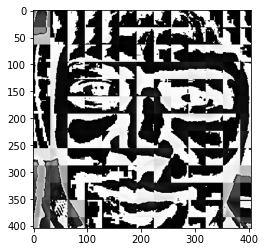

In [25]:
im_har = w2d(cropped_image, 'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
sibling_file_names_dict

{'Fajar': ['./dataset/cropped/Fajar\\Fajar1.png',
  './dataset/cropped/Fajar\\Fajar10.png',
  './dataset/cropped/Fajar\\Fajar11.png',
  './dataset/cropped/Fajar\\Fajar12.png',
  './dataset/cropped/Fajar\\Fajar13.png',
  './dataset/cropped/Fajar\\Fajar14.png',
  './dataset/cropped/Fajar\\Fajar15.png',
  './dataset/cropped/Fajar\\Fajar16.png',
  './dataset/cropped/Fajar\\Fajar17.png',
  './dataset/cropped/Fajar\\Fajar18.png',
  './dataset/cropped/Fajar\\Fajar2.png',
  './dataset/cropped/Fajar\\Fajar20.png',
  './dataset/cropped/Fajar\\Fajar21.png',
  './dataset/cropped/Fajar\\Fajar22.png',
  './dataset/cropped/Fajar\\Fajar23.png',
  './dataset/cropped/Fajar\\Fajar24.png',
  './dataset/cropped/Fajar\\Fajar25.png',
  './dataset/cropped/Fajar\\Fajar26.png',
  './dataset/cropped/Fajar\\Fajar27.png',
  './dataset/cropped/Fajar\\Fajar28.png',
  './dataset/cropped/Fajar\\Fajar29.png',
  './dataset/cropped/Fajar\\Fajar3.png',
  './dataset/cropped/Fajar\\Fajar30.png',
  './dataset/cropped/Fajar\\

In [27]:
class_dict = {}
count=0
for sibling_name in sibling_file_names_dict.keys():
    class_dict[sibling_name] = count
    count=count + 1
class_dict

{'Fajar': 0, 'Hassan': 1, 'Hussain': 2, 'Mehral': 3}

In [28]:
X=[]
y=[]
for sibling_name, training_files in sibling_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[sibling_name])

In [29]:
len(X[0])

4096

In [30]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(143, 4096)

In [31]:
y[1]

0

In [32]:
#Creating a Model

In [33]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
pipe = Pipeline([('scaler',StandardScaler()), ('svc',SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6111111111111112

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.60      0.75      0.67         8
           2       0.43      0.86      0.57         7
           3       0.71      0.45      0.56        11

    accuracy                           0.61        36
   macro avg       0.69      0.64      0.62        36
weighted avg       0.71      0.61      0.61        36



In [36]:
model_params = {
    'svm' : {
        'model': svm.SVC(gamma='auto', probability =True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C' : [1,5,10]
        }
    }
}

In [37]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append ({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.674459,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.616883,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.580952,{'logisticregression__C': 10}


In [38]:
best_estimators['svm'].score(X_test,y_test)

0.6111111111111112

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6666666666666666

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[5, 2, 2, 1],
       [0, 6, 1, 1],
       [0, 1, 6, 0],
       [0, 1, 5, 5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

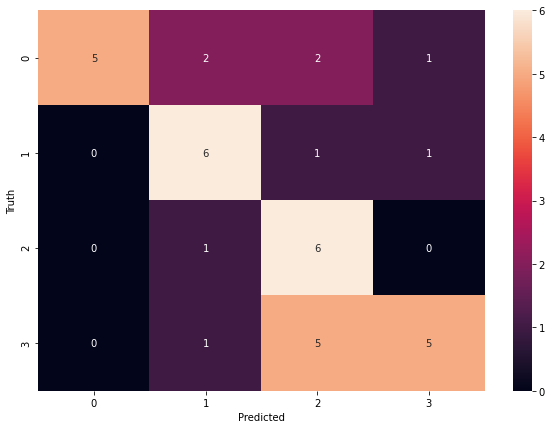

In [42]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [46]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))